In [5]:
using PyPlot

In [6]:
include("ED.jl")
include("TetronWithDot.jl")

Basis size:16
Eigenvalues: [-0.5, 0.5, 4.5, 4.5, 4.5, 5.5, 5.5, 5.5, 9.5, 9.5, 10.5, 10.5, 20.0, 20.0, 25.0, 25.0]
i g1 g2 of state #1: 1.6653345369377348e-16 + 0.0im
i g1 g3 of state #1: -0.5000000000000001 + 0.0im
dot occupation: 0.0 + 0.0im
total particle number: 2.0 + 0.0im



i g1 g2 of state #2: -1.6653345369377348e-16 + 0.0im
i g1 g3 of state #2: 0.5000000000000001 + 0.0im
dot occupation: 0.0 + 0.0im
total particle number: 2.0 + 0.0im



i g1 g2 of state #3: -1.6653345369377348e-16 + 0.0im
i g1 g3 of state #3: -0.5000000000000001 + 0.0im
dot occupation: 0.0 + 0.0im
total particle number: 1.0 + 0.0im



i g1 g2 of state #4: 1.6653345369377348e-16 + 0.0im
i g1 g3 of state #4: -0.5000000000000001 + 0.0im
dot occupation: 0.0 + 0.0im
total particle number: 3.0 + 0.0im





In [149]:
basis = SCBasis(3, 1, 4)
println("Basis size:", basis_size(basis))

A = zeros(4,4)
A[2,4] = 1.0
A = A-A'

at1 = 1.0
t1 = at1*exp(pi/2*im)
t3 = at1+0*im
Ec = 5.0
N0 = 2.0
ed = 0.0

H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
ef = eigfact(Hermitian(H))

println("Eigenvalues: ",ef[:values])

Ag1g2 = zeros(4,4)
Ag1g2[1,2] = 1
Ag1g2[2,1] = -1
ig1g2 = gamma_matrix(basis, Ag1g2)

Ag1g3 = zeros(4,4)
Ag1g3[1,3] = 1
Ag1g3[3,1] = -1
ig1g3 = gamma_matrix(basis, Ag1g3)

Ag2g4 = zeros(4,4)
Ag2g4[2,4] = 1
Ag2g4[4,2] = -1
ig2g4 = gamma_matrix(basis, Ag2g4)

ndot = dot_occupation(basis)
nbox1 = box_occupation(basis, true)
nbox2 = box_occupation(basis, false)

TN = TotalNumberOperator(basis)

for n = 1:4
    psi = ef[:vectors][:,n]
    println("i g1 g2 of state #",n,": ",dot(psi,ig1g2*psi))
    println("i g1 g3 of state #",n,": ",dot(psi,ig1g3*psi))
    println("i g2 g4 of state #",n,": ",dot(psi,ig2g4*psi))
    println("dot occupation: ",dot(psi,ndot*psi))
    println("box occupation 1: ",dot(psi,nbox1*psi))
    println("box occupation 2: ",dot(psi,nbox2*psi))
    println("total particle number: ",dot(psi,TN*psi))
    println("\n\n")
end

Basis size:32
Eigenvalues: [-0.692582, -0.5, 0.307418, 0.5, 4.46781, 4.5, 4.5, 4.69258, 5.43363, 5.5, 5.5, 5.69258, 19.4601, 19.5, 20.0, 20.0322, 20.5, 20.5664, 44.5, 44.5399, 45.4715, 45.5, 79.4778, 79.5, 80.5, 80.5285, 124.5, 124.522, 125.491, 125.5, 180.0, 180.009]
i g1 g2 of state #1: -1.0269562977782698e-14 + 0.0im
i g1 g3 of state #1: 0.4642383454426298 + 0.0im
i g2 g4 of state #1: -0.5000000000000001 + 0.0im
dot occupation: 0.96423834544263 + 0.0im
box occupation 1: 2.035761654557371 + 0.0im
box occupation 2: 1.0000000000000209 + 0.0im
total particle number: 3.000000000000001 + 0.0im



i g1 g2 of state #2: 6.661338147750939e-16 + 0.0im
i g1 g3 of state #2: 0.4999999999999997 + 0.0im
i g2 g4 of state #2: -0.4999999999999997 + 0.0im
dot occupation: 1.0847598287307096e-30 + 0.0im
box occupation 1: 1.9999999999999991 + 0.0im
box occupation 2: 0.9999999999999981 + 0.0im
total particle number: 1.9999999999999991 + 0.0im



i g1 g2 of state #3: -5.273559366969494e-16 + 0.0im
i g1 g3 o

In [232]:
function recognize_state(psi)
    tn = real(dot(psi, TN*psi))
    if abs(tn-2) < 1e-3
        tn = 0
    else
        tn = 1
    end
    sz = real(dot(psi, ig1g3*psi))
    if sz > 0
        sz = 0
    else
        sz = 1
    end
    return 2*tn+sz+1
end

recognize_state (generic function with 1 method)

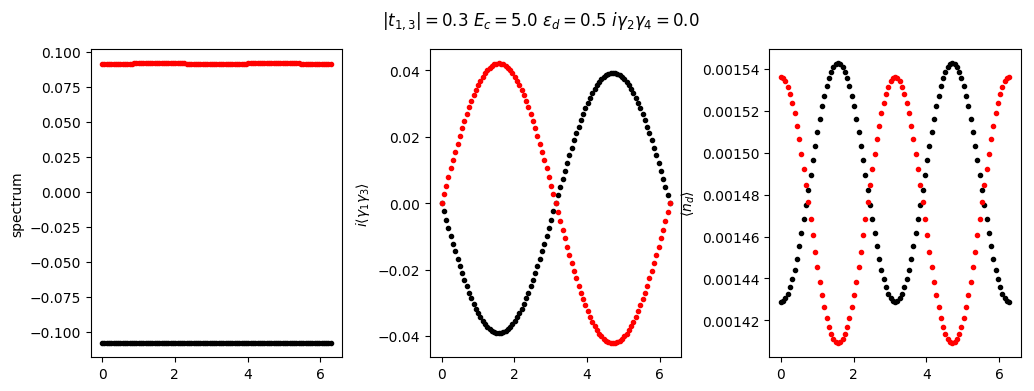

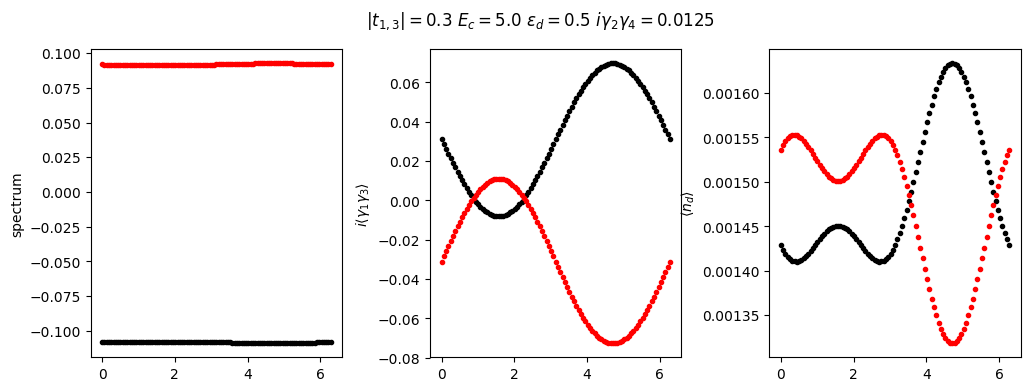

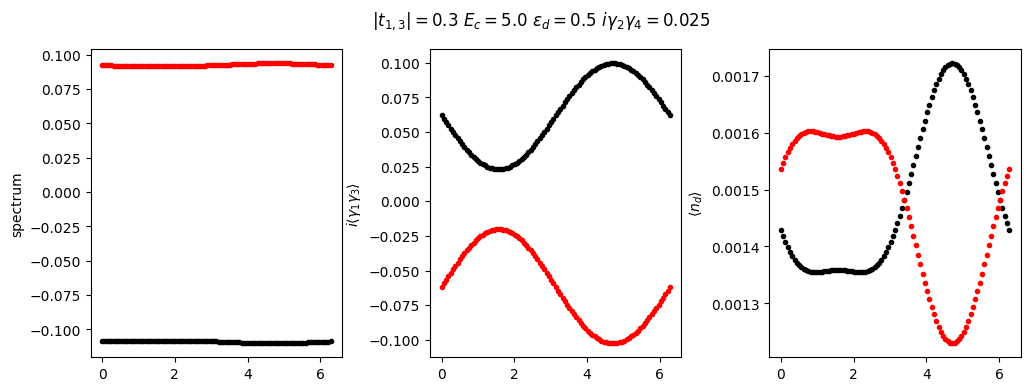

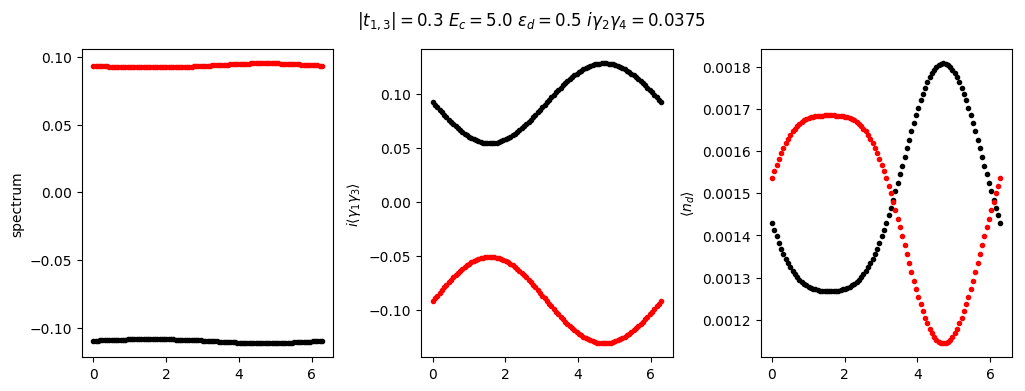

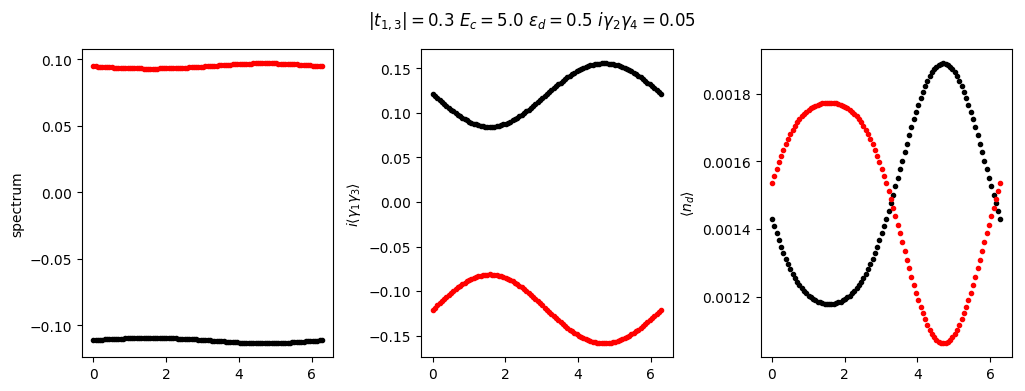

In [281]:
colors = ["black","red","green","blue"]

for splitting in linspace(0.0,0.05,5)
    x = linspace(0,2*pi,101)
    y = zeros(length(x),4)
    sz = zeros(length(x), 4)
    nd = zeros(length(x), 4)
    tn = zeros(length(x), 4)

    tabs = 0.3
    Ec = 5.0
    N0 = 2.0
    ed = 0.5
    
    A = zeros(4,4)
    A[2,4] = splitting
    A[1,2] = 0.1
    A[3,4] = A[1,2]
    A = A-A'

    for (ix,phase) in enumerate(x)
        t1 = tabs*exp(phase*im)
        t3 = tabs+0*im

        H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
        ef = eigfact(Hermitian(H))
        
        for n = 1:4
            psi = ef[:vectors][:,n]
#             ns = recognize_state(psi)
            ns = n
            y[ix,ns]  = ef[:values][n]
            tn[ix,ns] = real(dot(psi, TN*psi))
            sz[ix,ns] = real(dot(psi, ig1g3*psi))
            nd[ix,ns] = real(dot(psi, ndot*psi))
        end
    end

    figure(figsize=(12,4))
    ttl = @sprintf "\$|t\_\{1,3\}|=%s\$ \$E\_c=%s\$ \$\\epsilon\_d=%s\$ \$i \\gamma\_2 \\gamma\_4=%s\$" tabs Ec ed splitting
    suptitle(ttl)
    
    subplot(131)
    for n = 1:2
        for k = 1:size(y,1)
            if abs(tn[k,n]-3) < 1e-8
                plot(x[k],y[k,n],"x",color=colors[n])
            else
                plot(x[k],y[k,n],".",color=colors[n])
            end
        end
#         plot(x, y[:,n], "-")
    end
    ylabel("spectrum")
    
    subplot(132)
    for n = 1:2
        plot(x,sz[:,n],".",color=colors[n])
    end
    ylabel(L"i \langle \gamma_1 \gamma_3 \rangle")
    
    subplot(133)
    for n = 1:2
        plot(x,nd[:,n],".",color=colors[n])
    end
    ylabel(L"\langle n_d \rangle")
    
    subplots_adjust(wspace=0.35)
end

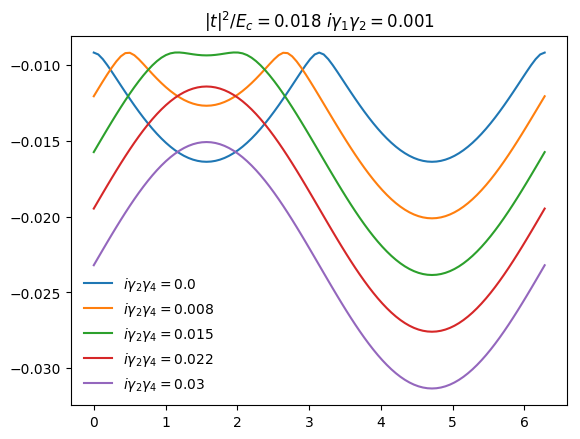

In [275]:
for splitting in linspace(0.0,0.03,5)
    x = linspace(0,2*pi,101)
    y = zeros(length(x),4)

    tabs = 0.3
    Ec = 5.0
    N0 = 2.0
    ed = 0.5
    
    A = zeros(4,4)
    A[2,4] = splitting
    A[1,2] = 0.001
    A[3,4] = A[1,2]
    A = A-A'

    for (ix,phase) in enumerate(x)
        t1 = tabs*exp(phase*im)
        t3 = tabs+0*im

        H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
        ef = eigfact(Hermitian(H))
        
        for n = 1:4
            psi = ef[:vectors][:,n]
#             ns = recognize_state(psi)
            ns = n
            if ns == 1
                y[ix] = ef[:values][n]
            end
        end
    end

    lbl = @sprintf "\$i \\gamma\_2 \\gamma\_4 = %s\$" round(splitting,3)
    plot(x, y[:,1], label=lbl)
    
    ttl = @sprintf "\$\|t\|\^2/E\_c=%s\$ \$i \\gamma\_1 \\gamma\_2=%s\$" tabs^2/Ec A[1,2]
    title(ttl)
end
legend(loc=0, frameon=false)

savefig("periodicity.pdf")

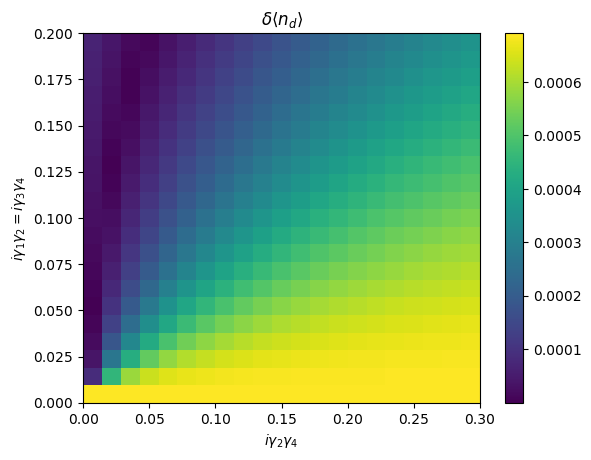

PyObject <matplotlib.colorbar.Colorbar object at 0x135902710>

In [204]:
s24 = linspace(0,0.3,21)
s12 = linspace(0,0.2,21)

Z = zeros(length(s24),length(s12))

for (ix,splitting_24) in enumerate(s24)
    for (iy,splitting_12) in enumerate(s12)
        tabs = 0.1
        Ec = 3.0
        N0 = 2.0
        ed = 0.8
    
        A = zeros(4,4)
        A[2,4] = splitting_24
        A[1,2] = splitting_12
        A[3,4] = splitting_12
#         A[1,3] = 0.01
        A = A-A'

        phase = 1.5*pi
        t1 = tabs*exp(phase*im)
        t3 = tabs+0*im

        H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
        ef = eigfact(Hermitian(H))
  
        psi0 = ef[:vectors][:,1]
        psi1 = ef[:vectors][:,2]
        
        TN0 = real(dot(psi0, TN*psi0))
        TN1 = real(dot(psi1, TN*psi1))
        @assert abs(TN0-TN1) < 1e-6
        
        nd0 = real(dot(psi0, ndot*psi0))
        nd1 = real(dot(psi1, ndot*psi1))
        Z[ix,iy] = abs(nd0-nd1)
    end
end

# Z
imshow(Z', extent=(minimum(s24),maximum(s24),minimum(s12),maximum(s12)), aspect="auto", origin="lower")
xlabel(L"i \gamma_2 \gamma_4")
ylabel(L"i \gamma_1 \gamma_2 = i \gamma_3 \gamma_4")
title(L"\delta \langle n_d \rangle")
colorbar()

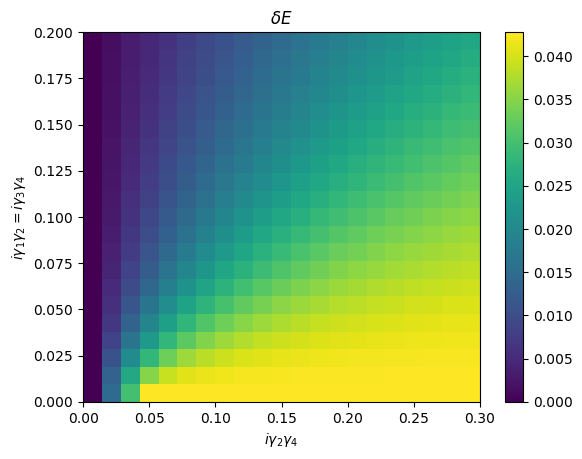

PyObject <matplotlib.colorbar.Colorbar object at 0x13bf3f110>

In [218]:
s24 = linspace(0,0.3,21)
s12 = linspace(0,0.2,21)

Z = zeros(length(s24),length(s12))

for (ix,splitting_24) in enumerate(s24)
    for (iy,splitting_12) in enumerate(s12)
        tabs = 0.5
        Ec = 5.0
        N0 = 2.0
        ed = 0.8
    
        A = zeros(4,4)
        A[2,4] = splitting_24
        A[1,2] = splitting_12
        A[3,4] = splitting_12
#         A[1,3] = 0.01
        A = A-A'

        e = Float64[]
        for phase in [0.5*pi,1.5*pi]
            t1 = tabs*exp(phase*im)
            t3 = tabs+0*im

            H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
            evals = eigvals(Hermitian(H))
            push!(e, evals[1])
        end
        
        Z[ix,iy] = abs(e[1]-e[2])
    end
end

# Z
imshow(Z', extent=(minimum(s24),maximum(s24),minimum(s12),maximum(s12)), aspect="auto", origin="lower")
xlabel(L"i \gamma_2 \gamma_4")
ylabel(L"i \gamma_1 \gamma_2 = i \gamma_3 \gamma_4")
title(L"\delta E")
colorbar()

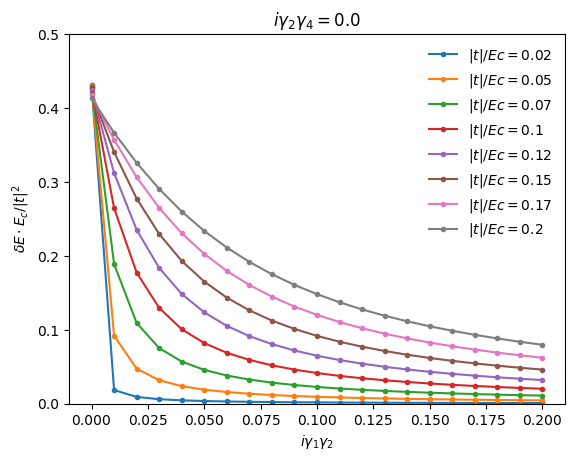

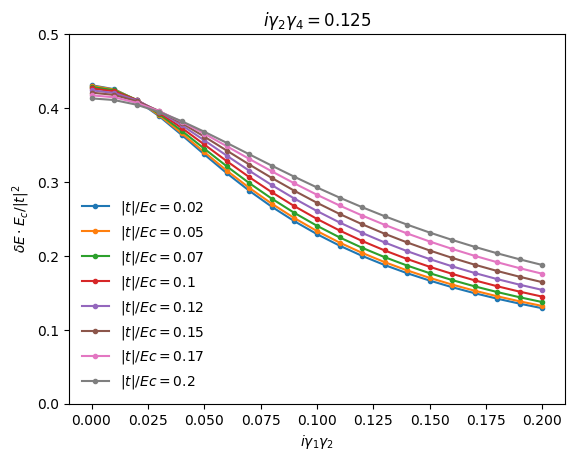

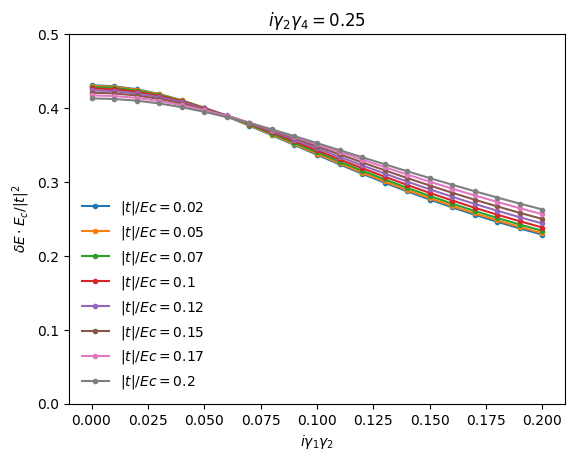

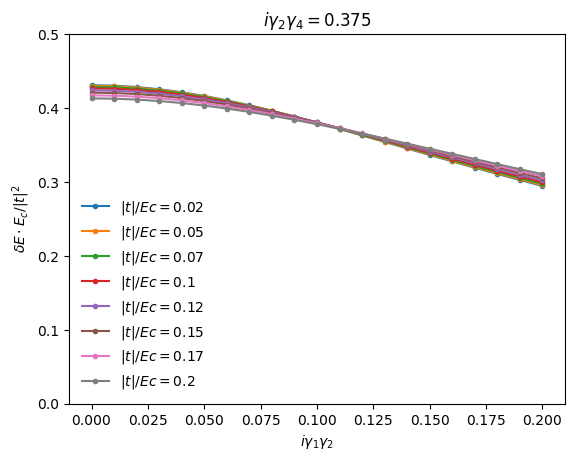

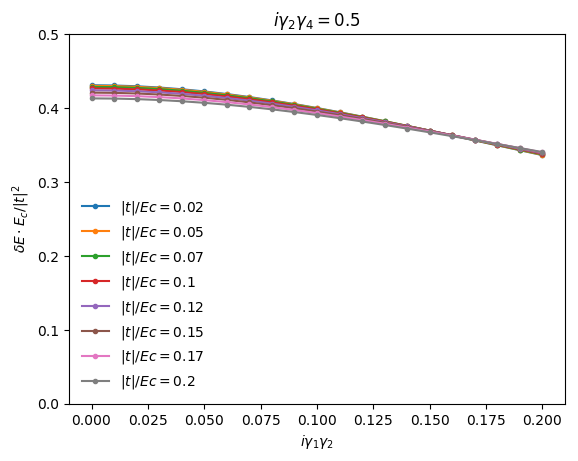

In [285]:
for splitting_24 in linspace(0.0,0.5,5)
    figure()
    title(@sprintf "\$i \\gamma\_2 \\gamma\_4 = %s\$" splitting_24)
    for tabs in linspace(0.1,1.0,8)
        s12 = linspace(0, 0.2, 21)
        y = zeros(length(s12))

        for (ix,splitting_12) in enumerate(s12)
            tabs = tabs
            Ec = 5.0
            N0 = 2.0
            ed = 0.8

            A = zeros(4,4)
            A[2,4] = splitting_24
            A[1,2] = splitting_12
            A[3,4] = splitting_12
    #         A[1,3] = 0.01
            A = A-A'

            e = Float64[]
            for phase in [pi,1.5*pi]
                t1 = tabs*exp(phase*im)
                t3 = tabs+0*im

                H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
                evals = eigvals(Hermitian(H))
                push!(e, evals[1])
            end

            y[ix] = abs(e[1]-e[2])
        end

        lbl = @sprintf "\$|t|/Ec=%s\$" round(tabs/Ec,2)
        plot(s12, y*Ec/tabs^2, ".-", label=lbl)
    end
    ylabel(L"\delta E \cdot E_c/|t|^2")
    xlabel(L"i \gamma_1 \gamma_2")
    legend(loc=0, frameon=false)
    
    ylim(0, 0.5)
    
    fname = @sprintf "dE_ig2g4%s.pdf" splitting_24
    savefig(fname)
end

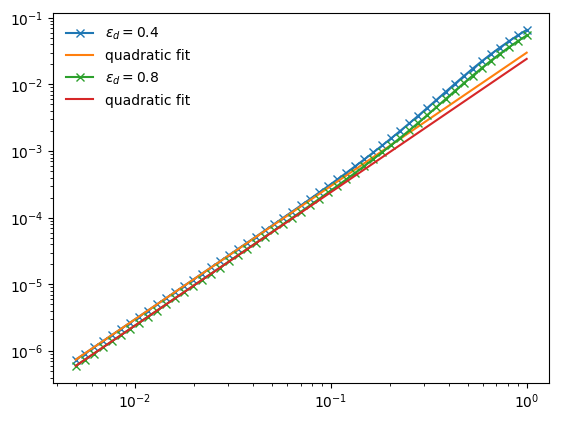

PyObject <matplotlib.legend.Legend object at 0x13deee2d0>

In [160]:
# tabs = linspace(0.01,1.0,51)
tabs = logspace(log(0.1),log(1.0),51)

for ed in [0.4,0.8]
    y = zeros(length(tabs))
    for (itab,tab) in enumerate(tabs)
        Ec = 3.0
        N0 = 2.0

        A = zeros(4,4)
        A[2,4] = 0.05
        A[1,2] = 0.05
        A[3,4] = 0.05
        A[1,3] = 0.01
        A = A-A'

        phase = 1.5*pi
        t1 = tab*exp(phase*im)
        t3 = tab+0*im

        H = TetronHamiltonian(basis, A, t1, t3, Ec, N0, ed)
        ef = eigfact(Hermitian(H))

        psi0 = ef[:vectors][:,1]
        psi1 = ef[:vectors][:,2]

        TN0 = real(dot(psi0, TN*psi0))
        TN1 = real(dot(psi1, TN*psi1))
        @assert abs(TN0-TN1) < 1e-6

        nd0 = real(dot(psi0, ndot*psi0))
        nd1 = real(dot(psi1, ndot*psi1))

        y[itab] = abs(nd0-nd1)
    end

    plot(tabs, y, "x-", label=@sprintf "\$\\epsilon\_d=%s\$" ed)

    xscale("log")
    yscale("log")
    plot(tabs, y[1]/tabs[1]^2*tabs.^2, label="quadratic fit")
end

legend(loc=0, frameon=false)

In [287]:
HTML("""
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>
    """)

HTML{String}("<script src=\"https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js\"></script>\n    ")